In [43]:
import pandas as pd
import numpy as np

from functools import reduce
from operator import concat
import matplotlib.pyplot as plt

In [2]:
variants = ('a', 'b', 'c', 'd', 'e', 'f', 'g')
frames = [pd.read_csv(f'files/pso_{v}.csv') for v in variants]
df = pd.concat(frames)
df_iterations = df[[f'{v}_iterations' for v in variants]]
df_solution = df[[f'{v}_solution' for v in variants]]

fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

<Figure size 1332x756 with 0 Axes>

In [3]:
df_iterations.describe()

,a_iterations,b_iterations,c_iterations,d_iterations,e_iterations,f_iterations,g_iterations
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000
mean,185.730000,155.620000,202.950000,190.980000,25.510000,400.0,21.720000
std,29.515226,15.935337,79.234134,29.984164,7.357392,0.0,8.134078
min,41.000000,101.000000,12.000000,33.000000,15.000000,400.0,10.000000
25%,177.000000,144.750000,143.750000,181.000000,20.000000,400.0,16.000000
50%,189.500000,155.000000,223.500000,197.000000,24.500000,400.0,21.000000
75%,202.000000,167.250000,265.750000,209.250000,29.000000,400.0,26.000000
max,234.000000,192.000000,334.000000,233.000000,57.000000,400.0,50.000000


In [4]:
df_solution.describe()

,a_solution,b_solution,c_solution,d_solution,e_solution,f_solution,g_solution
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,14.123712,0.024564,202.947957,0.063136,46.777138,0.003694,0.010920
std,102.184406,0.156552,857.965320,0.482391,23.478150,0.004738,0.006581
min,0.000926,0.000298,0.000964,0.000007,4.980968,0.000000,0.000120
25%,0.002688,0.001722,0.011546,0.000027,30.330625,0.000000,0.009719
50%,0.005588,0.003329,0.109486,0.000046,44.492317,0.000000,0.009778
75%,0.012861,0.007616,8.189223,0.000099,56.461809,0.009716,0.010097
max,888.826645,1.566554,7008.234345,4.505719,114.236214,0.009716,0.053997


<AxesSubplot:>

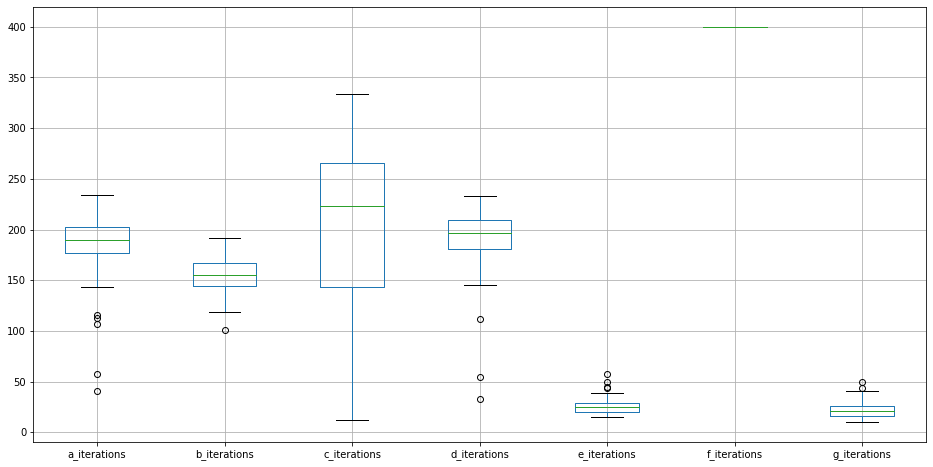

In [5]:
df_iterations.boxplot(figsize=(16, 8))

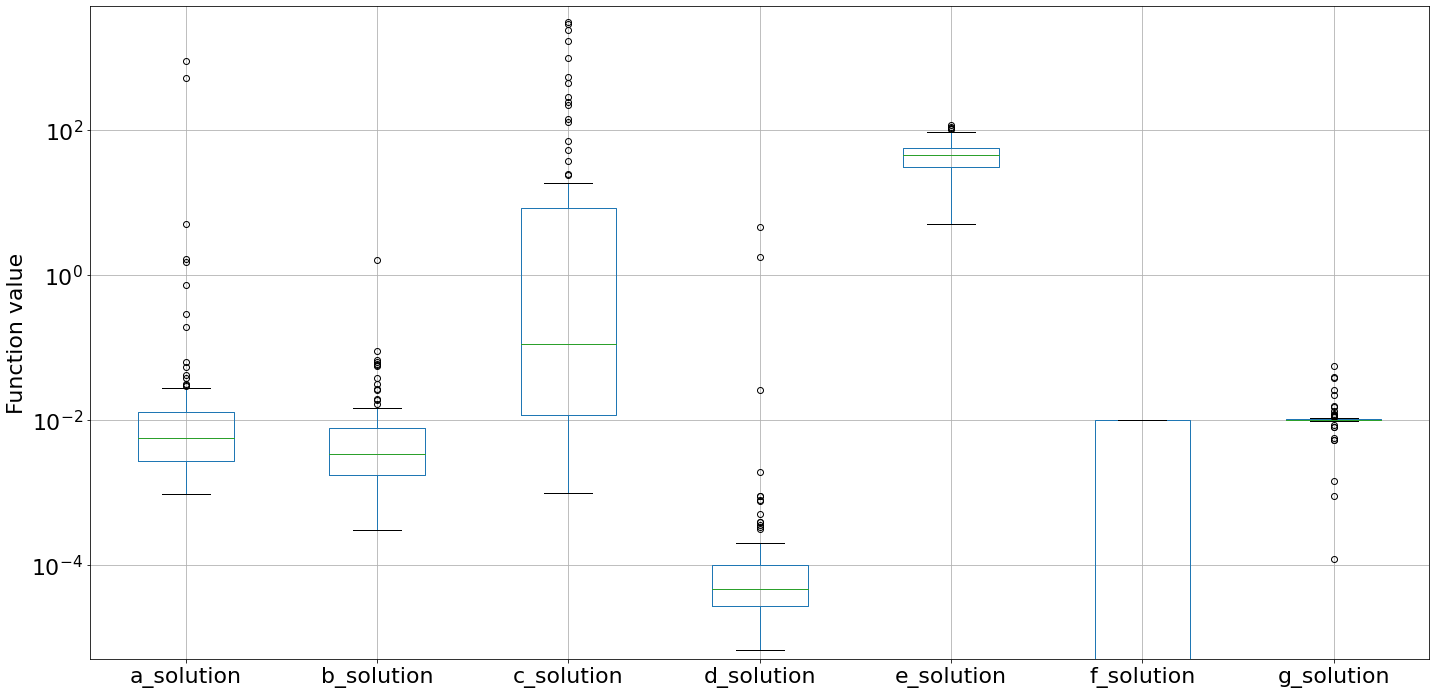

In [6]:
plt.rcParams.update({'font.size': 22})
ax = df_solution.boxplot(figsize=(24, 12))
ax.set_yscale('log')
ax.set_ylim(5e-6, 5e3)
ax.set_ylabel('Function value')
plt.show()

In [7]:
df_y = {v: pd.read_csv(f'files/pso_{v}_y_matrix.csv') for v in variants}
df_means_over_repeats = pd.DataFrame()
for k, v in df_y.items():
    # replace NaNs
    v.fillna(method='ffill', axis=0, inplace=True)
    # add means
    v[f'{k}_mean'] = v.mean(axis=1)
    
# add mean columns to new data frame
df_means_over_repeats = pd.concat(
    [v[f'{k}_mean'] for k, v in df_y.items()], 
     axis=1
     )
# extend iterations by replacing NaNs with latest value
df_means_over_repeats.fillna(method='ffill', axis=0, inplace=True)

(0.001, 10000000.0)

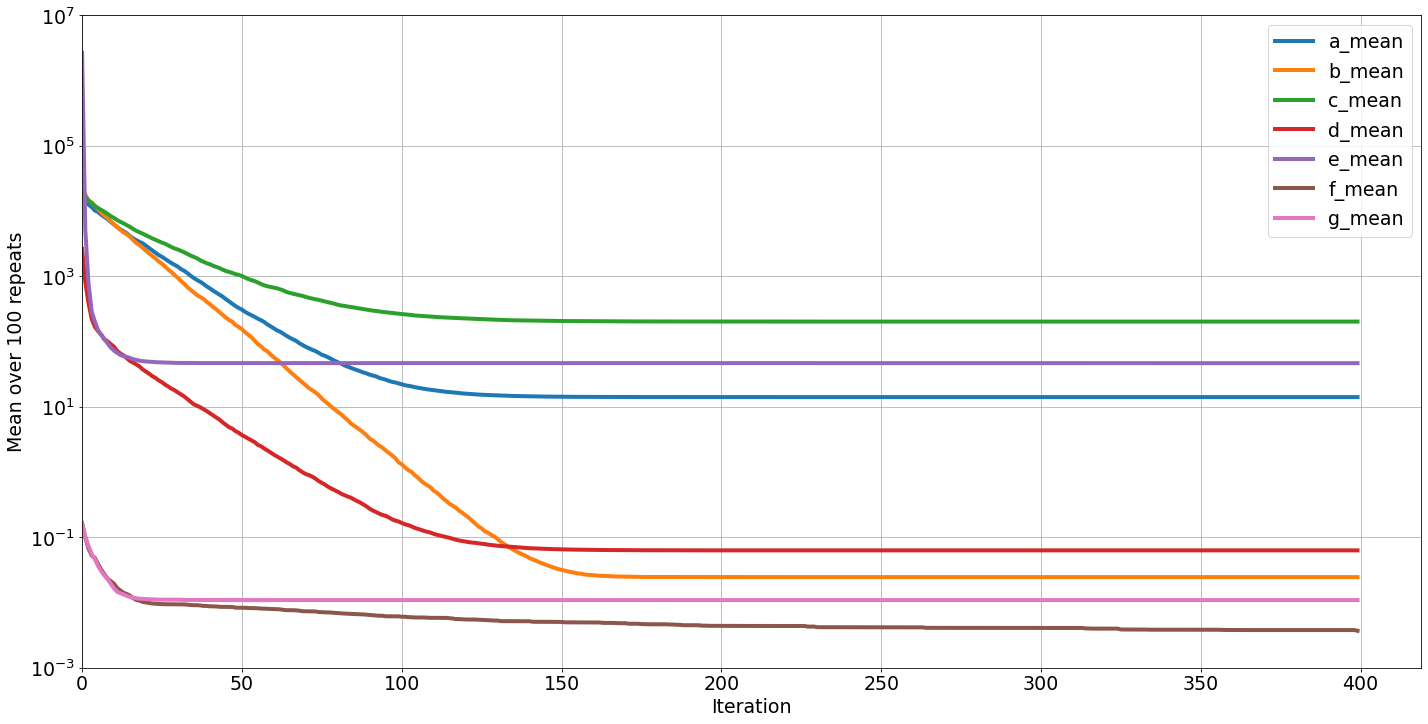

In [8]:
plt.rcParams.update({'font.size': 19})
ax = df_means_over_repeats.plot.line(
    figsize=(24, 12),
    grid=True,
    ylabel='Mean over 100 repeats',
    xlabel='Iteration',
    lw=4
)
ax.set_yscale('log')
ax.set_xlim(xmin=0)
ax.set_ylim(1e-3, 1e7)

In [45]:
variants = ('f1', 'f2', 'f5', 'f10', 'f11')
frames = [pd.read_csv(f'files/pso_{v}.csv') for v in variants]
df_pso = pd.concat(frames)
df_pso = df_pso[[f'{v}_solution' for v in variants]]

frames = [pd.read_csv(f'files/ga_{v}.csv') for v in variants]
df_ga = pd.concat(frames)
df_ga = df_ga[[f'ga_{v}_solution' for v in variants]]

df_solution = pd.concat([df_pso, df_ga])
cols = [[f'{v}_solution', f'ga_{v}_solution'] for v in variants]
cols = reduce(concat, cols)
df_solution[cols].describe()

,f1_solution,ga_f1_solution,f2_solution,ga_f2_solution,f5_solution,ga_f5_solution,f10_solution,ga_f10_solution,f11_solution,ga_f11_solution
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000
mean,0.005238,6.574951,0.005648,6.434125,27.468982,2.423227,9.777039e-21,2.512222e-05,-38.008066,-18.582141
std,0.004855,2.451819,0.005593,2.780693,7.813535,0.801596,1.882708e-20,3.219447e-05,5.972963,10.037440
min,0.000256,3.077286,0.000308,2.150981,10.170891,0.921658,1.956675e-24,4.613229e-07,-48.293743,-40.610418
25%,0.001952,4.801236,0.001735,4.453181,22.976649,1.867010,3.924673e-22,7.522885e-06,-42.401969,-23.219827
50%,0.003420,5.776217,0.003518,6.136500,26.605956,2.459162,1.676176e-21,1.299732e-05,-38.177543,-20.256538
75%,0.006384,7.397391,0.007978,7.580987,30.631244,3.087293,8.568481e-21,2.872633e-05,-34.206174,-12.332418
max,0.019980,11.965395,0.027514,13.359336,57.834582,4.252268,8.119668e-20,1.685443e-04,-22.545055,8.960808
